In [1]:
#using Revise
addprocs(4)
using Walk1DMDP, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
## Study

In [3]:
study0 = RewardvsN(Walk1D)
study0.bandits=[DPWBandit,RandomBandit]

2-element Array{DataType,1}:
 MCTS.DPWBandit   
 MCTS.RandomBandit

In [4]:
result0 = run_study(study0)

CMDPs.RewardvsNResult("Walk1D", 3600×4 DataFrames.DataFrame
│ Row  │ alg          │ seed │ n_iters │ r_total  │
├──────┼──────────────┼──────┼─────────┼──────────┤
│ 1    │ DPWBandit    │ 1    │ 10      │ -17.6095 │
│ 2    │ DPWBandit    │ 2    │ 10      │ -14.0272 │
│ 3    │ DPWBandit    │ 3    │ 10      │ -28.9227 │
│ 4    │ DPWBandit    │ 4    │ 10      │ -25.8502 │
│ 5    │ DPWBandit    │ 5    │ 10      │ -25.7996 │
│ 6    │ DPWBandit    │ 6    │ 10      │ -23.7794 │
│ 7    │ DPWBandit    │ 7    │ 10      │ -28.7964 │
│ 8    │ DPWBandit    │ 8    │ 10      │ -14.996  │
│ 9    │ DPWBandit    │ 9    │ 10      │ -22.8466 │
│ 10   │ DPWBandit    │ 10   │ 10      │ -25.3505 │
│ 11   │ DPWBandit    │ 11   │ 10      │ -29.6515 │
⋮
│ 3589 │ RandomBandit │ 189  │ 1250    │ -15.8837 │
│ 3590 │ RandomBandit │ 190  │ 1250    │ -12.7325 │
│ 3591 │ RandomBandit │ 191  │ 1250    │ -13.7353 │
│ 3592 │ RandomBandit │ 192  │ 1250    │ -12.6683 │
│ 3593 │ RandomBandit │ 193  │ 1250    │ -13.7199 │
│ 

In [5]:
study1 = RewardvsN(Walk1D)
study1.bandits=[CBTSDPWBandit]

1-element Array{DataType,1}:
 MCTS.CBTSDPWBandit

In [14]:
result1 = run_study(study1)

CMDPs.RewardvsNSim(Walk1DMDP.Walk1D(Walk1DMDP.Walk1DParams(1.0, 10.0, 20), Distributions.Normal{Float64}(μ=0.0, σ=1.0)), MCTS.RandomBandit, 1250, 199, 20, Dict{Symbol,Any}(Pair{Symbol,Any}(:sim_max_steps, 20),Pair{Symbol,Any}(:sim_mdp, "Walk1D"),Pair{Symbol,Any}(:sim_n_ters, 1250),Pair{Symbol,Any}(:sim_algorithm, "RandomBandit"),Pair{Symbol,Any}(:sim_seed, 199)))

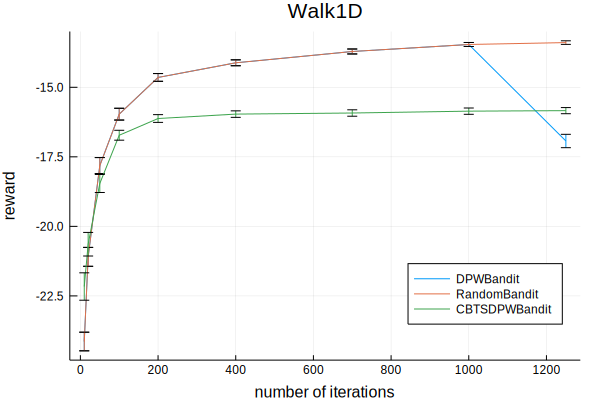

In [7]:
p=plot(result0,result1)

In [8]:
savefig(p, "./RvN_Walk1d.pdf")

In [19]:
sim=generate_sim_q(study0)[end-1]

CMDPs.RewardvsNSim(Walk1DMDP.Walk1D(Walk1DMDP.Walk1DParams(1.0, 10.0, 20), Distributions.Normal{Float64}(μ=0.0, σ=1.0)), MCTS.RandomBandit, 1250, 199, 20, Dict{Symbol,Any}(Pair{Symbol,Any}(:sim_max_steps, 20),Pair{Symbol,Any}(:sim_mdp, "Walk1D"),Pair{Symbol,Any}(:sim_n_ters, 1250),Pair{Symbol,Any}(:sim_algorithm, "RandomBandit"),Pair{Symbol,Any}(:sim_seed, 199)))

In [22]:
rng=MersenneTwister(sim.seed)
mdp=sim.mdp
b=sim.bandit_t(mdp)
solver=ModularSolver(mdp, b, sim.seed; n_iterations=sim.n_iters)
policy=solve(solver, mdp)
s0=initial_state(mdp, rng)
hr=HistoryRecorder(; max_steps=sim.max_steps, rng=rng)
h=simulate(hr, mdp, policy, s0)

POMDPToolbox.MDPHistory{Walk1DMDP.Walk1DState,Float64}(Walk1DMDP.Walk1DState[Walk1DMDP.Walk1DState(0, 1.0), Walk1DMDP.Walk1DState(1, 2.47749), Walk1DMDP.Walk1DState(2, 3.63496), Walk1DMDP.Walk1DState(3, 5.52992), Walk1DMDP.Walk1DState(4, 6.63599), Walk1DMDP.Walk1DState(5, 8.55252), Walk1DMDP.Walk1DState(6, 10.0105)], [1.47749, 1.15747, 1.89497, 1.10607, 1.91653, 1.45793], [-2.01042, -1.5888, -2.71439, -1.53063, -2.75548, -1.98172], Any[nothing, nothing, nothing, nothing, nothing, nothing], Any[Dict{Symbol,Any}(Pair{Symbol,Any}(:tree_queries, 1250),Pair{Symbol,Any}(:search_time_us, 0x000000000000d0ff),Pair{Symbol,Any}(:best_path, MCTS.BestPathTracker(Any[Walk1DMDP.Walk1DState(0, 1.0)], Any[-0.000565997], -0.918939, Any[], Any[], 0.0, 1.0, 1.0))), Dict{Symbol,Any}(Pair{Symbol,Any}(:tree_queries, 1250),Pair{Symbol,Any}(:search_time_us, 0x000000000000ca0d),Pair{Symbol,Any}(:best_path, MCTS.BestPathTracker(Any[Walk1DMDP.Walk1DState(1, 2.47749)], Any[0.000116105], -0.918939, Any[], Any[], 0.

In [24]:
h.state_hist

7-element Array{Walk1DMDP.Walk1DState,1}:
 Walk1DMDP.Walk1DState(0, 1.0)    
 Walk1DMDP.Walk1DState(1, 2.47749)
 Walk1DMDP.Walk1DState(2, 3.63496)
 Walk1DMDP.Walk1DState(3, 5.52992)
 Walk1DMDP.Walk1DState(4, 6.63599)
 Walk1DMDP.Walk1DState(5, 8.55252)
 Walk1DMDP.Walk1DState(6, 10.0105)

In [25]:
h.action_hist

6-element Array{Float64,1}:
 1.47749
 1.15747
 1.89497
 1.10607
 1.91653
 1.45793

In [70]:
mdp=Walk1D()
s=initial_state(mdp,Base.GLOBAL_RNG)

Walk1DMDP.Walk1DState(0, 1.0)

In [76]:
sp=generate_s(mdp, s, 1.5, Base.GLOBAL_RNG)
r=reward(mdp, s, 1.5, sp)
s=sp
s,r

(Walk1DMDP.Walk1DState(6, 10.0), -2.0439385332046727)

In [77]:
6*-2.044

-12.264

In [79]:
sort!(result0.data,:r_total,rev=true)

,alg,seed,n_iters,r_total
1,RandomBandit,112,1250,-12.3213
2,DPWBandit,138,1000,-12.3304
3,RandomBandit,138,1000,-12.3304
4,RandomBandit,35,1250,-12.348
5,DPWBandit,119,1000,-12.3696
6,RandomBandit,119,1000,-12.3696
7,RandomBandit,92,1250,-12.3816
8,DPWBandit,18,1000,-12.3884
9,RandomBandit,18,1000,-12.3884
10,RandomBandit,118,1250,-12.3884
